In [1]:
#Importamos librerías
import pandas as pd
import seaborn as sns

In [3]:
#Cargamos los datos y los preparamos!
data = pd.read_csv("../datasets/clase22/hotels.csv", sep = ",")
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
#Hacemos una copia del dataset y me quedo con algunas variables
data2 = data[['total_of_special_requests','deposit_type','customer_type', 'stays_in_weekend_nights', 'stays_in_week_nights', 'required_car_parking_spaces','arrival_date_month',
'arrival_date_day_of_month','hotel']].copy()

In [5]:
#Veamos que tenemos!
data2.head()

,total_of_special_requests,deposit_type,customer_type,stays_in_weekend_nights,stays_in_week_nights,required_car_parking_spaces,arrival_date_month,arrival_date_day_of_month,hotel
0,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel
1,0,No Deposit,Transient,0,0,0,July,1,Resort Hotel
2,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel
3,0,No Deposit,Transient,0,1,0,July,1,Resort Hotel
4,1,No Deposit,Transient,0,2,0,July,1,Resort Hotel


In [6]:
data2.shape

(119390, 9)

Creamos la variable target: 
    

In [7]:
data2['total_stay'] = data2['stays_in_week_nights'] + data2['stays_in_weekend_nights']

# Eliminamos las var q usamos...
data3 = data2.drop(['stays_in_week_nights','stays_in_weekend_nights'], axis=1)

In [8]:
data3.head()

,total_of_special_requests,deposit_type,customer_type,required_car_parking_spaces,arrival_date_month,arrival_date_day_of_month,hotel,total_stay
0,0,No Deposit,Transient,0,July,1,Resort Hotel,0
1,0,No Deposit,Transient,0,July,1,Resort Hotel,0
2,0,No Deposit,Transient,0,July,1,Resort Hotel,1
3,0,No Deposit,Transient,0,July,1,Resort Hotel,1
4,1,No Deposit,Transient,0,July,1,Resort Hotel,2


Text(0, 0.5, 'Frecuencia')

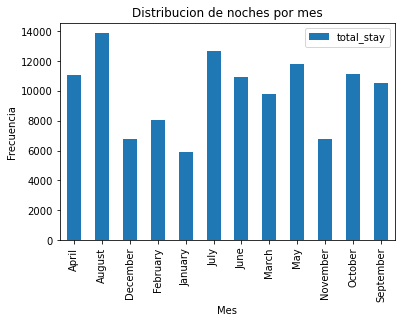

In [9]:
grafico_df=data3[['total_stay','arrival_date_month']].groupby('arrival_date_month').count()
grafico_df
import seaborn as sns
import matplotlib.pyplot as plt
grafico_df.plot(kind='bar')
plt.title('Distribucion de noches por mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

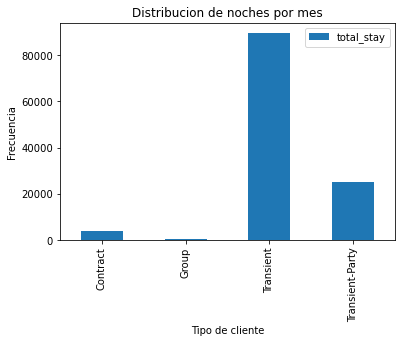

In [10]:
grafico_df=data3[['total_stay','customer_type']].groupby('customer_type').count()
grafico_df
import seaborn as sns
import matplotlib.pyplot as plt
grafico_df.plot(kind='bar')
plt.title('Distribucion de noches por mes')
plt.xlabel('Tipo de cliente')
plt.ylabel('Frecuencia')

Histogramas de las variables:

C:\Users\alk10\AppData\Local\Temp\ipykernel_12992\3077317509.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data3.hist(ax = fig.gca()) #Realizamos el histograma de las variables


array([[<AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'total_stay'}>]], dtype=object)

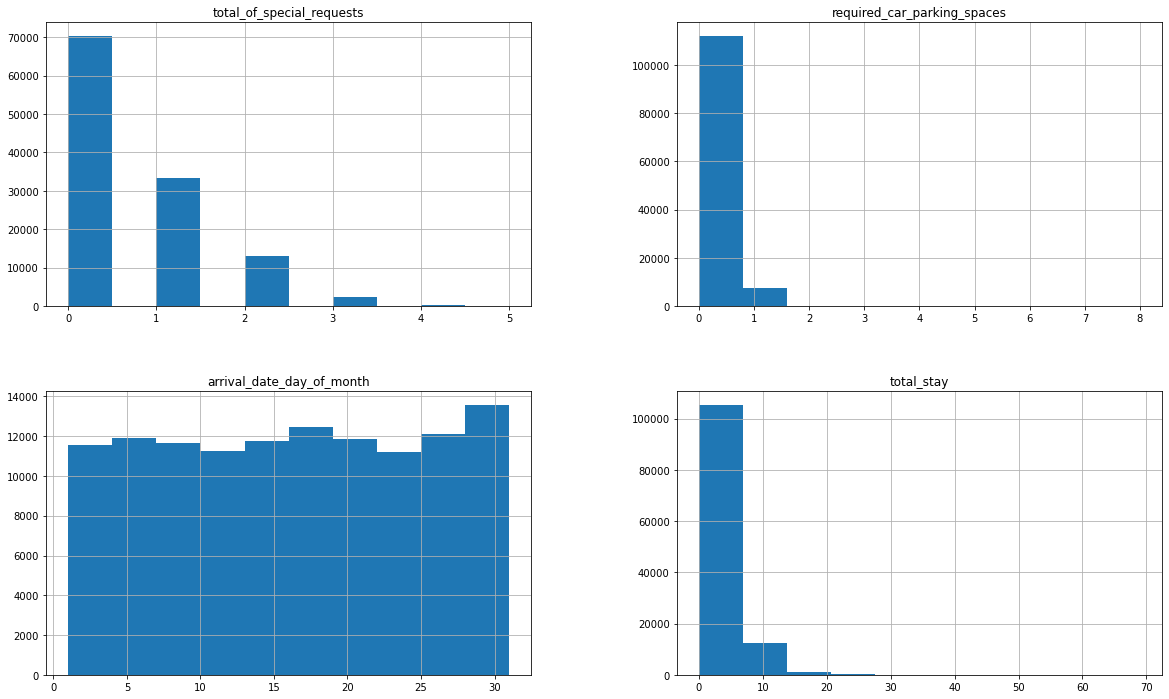

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,12)) #Definimos el tamaño del grafico
data3.hist(ax = fig.gca()) #Realizamos el histograma de las variables

In [12]:
data3.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [13]:
data3.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [14]:
#Hacemos dummies las variables!
data4=pd.get_dummies(data3, drop_first=False)

In [15]:
data4.head()

,total_of_special_requests,required_car_parking_spaces,arrival_date_day_of_month,total_stay,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,...,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,hotel_City Hotel,hotel_Resort Hotel
0,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,2,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [16]:
#Separamos los datos de entrada de los de salida
X_data=data4.drop('total_stay', axis=1)
y_data=data4['total_stay']

In [17]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [18]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [19]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [50,100,200],
    'max_features': [2,4,5],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',  # 
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [21]:
%%time
#Entrenamos el modelo (Se demora bastante!!!!!!)
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

In [ ]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_random_forest.best_params_

{'criterion': 'mse', 'max_depth': 5, 'max_features': 5, 'n_estimators': 100}

In [ ]:
random_forest_nuevo = RandomForestRegressor(criterion='mse',max_depth=5, max_features= 5, n_estimators=100) #Instanciamos el modelo

In [ ]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
X_train.shape

(83573, 24)

In [ ]:
X_test=X_test.drop(columns=['Prediccion'])
X_test

,total_of_special_requests,required_car_parking_spaces,arrival_date_day_of_month,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,hotel_City Hotel,hotel_Resort Hotel
88645,0,0,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
115346,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
81707,0,0,21,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
14952,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
61982,0,0,29,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21811,0,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
108990,1,0,3,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
63933,0,0,25,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
96754,1,0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
#Predicción de casos nuevos
random_forest_nuevo.predict(X_train)
random_forest_nuevo.predict(X_test)

array([3.11173552, 3.20761548, 2.66031522, ..., 2.75972258, 3.16871809,
       3.17148881])

In [ ]:
import numpy as np
X_test1= X_test.copy()
X_test1['Prediccion']=np.round(random_forest_nuevo.predict(X_test),0)
X_test1

,total_of_special_requests,required_car_parking_spaces,arrival_date_day_of_month,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,hotel_City Hotel,hotel_Resort Hotel,Prediccion
88645,0,0,7,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,3.0
115346,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,3.0
81707,0,0,21,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.0
14952,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,5.0
61982,0,0,29,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21811,0,0,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4.0
108990,1,0,3,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,3.0
63933,0,0,25,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.0
96754,1,0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3.0


Sólo nos restaría analizar las métricas de error, pero ese tema lo veremos en la sección correspondiente 😉